# CS6103 Assignment 3
## Machine Learning Diagnosis of Rice Leaf Diseases with scikit-learn
#### Jaime Pang, John Chai (M20604)

## Problem Description
Plant diseases are one of the major factors that lead to decreased yield and quality in agricultural crops, spelling a huge problem for farmers and endangering their livelihoods. In order to prevent loss of crops to diseases, it is imperative that farmers are able to accurately diagnose plant diseases quickly and administer the requisite treatment so as to mitigate the damage done to crops. However, it is difficult to ensure a constant monitoring of crops and even so, farmers might not be able to identify a disease on sight due to lack of experience. But with the advent of machine learning and agricultural AI, it is now possible to automate the detection of such diseases so that farmers can more efficiently mitigate the damage done to their crops by plant diseases.

## Dataset and Objectives
A dataset of iamges of diseased rice leaves was obtained from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Rice+Leaf+Diseases. The dataset was collected by Dharmsinh Desai University, Gujarat, India, and features images of rice plants afflicted with 3 types of diseases: Bacterial leaf blight, Brown spot and Leaf smut (Top to bottom). 
Each category contains 40 images of leaves. Of each set of 40, 36 were used for training and 4 were used for testing.
<img src="training/Bacterial leaf blight/DSC_0365.JPG" width="300px"><img src="training/Brown spot/DSC_0100.JPG" width="300px"><img src="training/Leaf smut/DSC_0309.JPG" width="300px">
 
The model here aims to be able to take a image of a diseased leaf as an input, and predict its corresponding disease type based on these 3 diseases.

In [6]:
import skimage
from skimage import io
import skimage.exposure
import skimage.transform
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage import filters
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
np.set_printoptions(threshold=np.inf)

## Loading dataset
The dataset is loaded from the folder entitled 'training'

In [2]:
ic = io.imread_collection('training\*\*.jpg')
print(type(ic[0]))
y = np.asarray(40 * ['Bacterial leaf blight'] + 40 * ['Brown spot'] + 40 * ['Leaf smut'])
# print((y))

<class 'numpy.ndarray'>


#### Preprocessed dataset

(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)


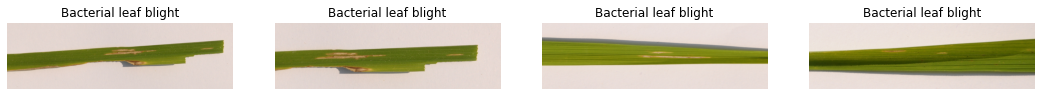

In [3]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for i in range(4):
    axes[i].axis('off')
    print(ic[i].shape)
    axes[i].imshow(ic[i])
    axes[i].set_title(y[i])

## Data preprocessing
Data needs to be processed first in order to eliminate any confounding variables in the images (e.g. brightness) that might confuse the training of the model and hinder the accuracy of predictions. Using skimage, the images are first cropped to 300 x 100 and the brightness is adjusted to standardise the colours of the background.

<class 'numpy.ndarray'>
(897, 3081, 3)
low/upp: 101.9947289294998/305.9841867884994


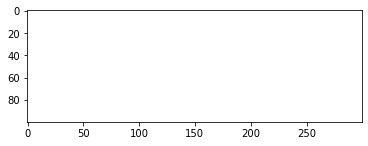

In [58]:
def exposure(img):
    #plt.imshow(imgg)
    #return skimage.exposure.adjust_log(imgg)
    return skimage.exposure.adjust_gamma(img, gamma=0.5,gain=1)

def resize(img):
    
    print(type(img))
    print(img.shape)
    img = skimage.transform.resize(img, (100,300))
    #print(type(img))
    #print(img.shape)
    return (img)
    
def get_edges(img):
    
    #https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio
    upp = filters.threshold_mean(rgb2gray(img)) * 428.57
    low = (1/3)*upp
    print("low/upp: " + str(low) + "/" + str(upp))
    img = np.uint8(img)
    canny_edges = cv2.Canny(img,low,upp)
    return canny_edges
    '''
    v = img.shape[0] # vertial pixels
    h = img.shape[1] # horizontal pixels 

    ver = int(h/2)
    cnt = []
    for i in range(canny_edges.shape[0]-ver):
        cnt.append(canny_edges[i:i+ver,:].sum()/255) # moving rectangle 

    cnt_arr = np.array(cnt)
    i = cnt_arr.argmax()

    Img_cropped = Image.fromarray(np.uint8(img[i:i+ver,:]))
    return Img_cropped
    '''
def deletebg(img):
    #use for getting rid of bg
    imgray = rgb2gray(img)
    thresh_val = threshold_mean(imgray) #or otsu - have to find one that works with all types of image
    mask = np.where(imgray > thresh_val, 0, 1)
    #print(imgray.shape)
    for i in range(len(imgray)):
        for j in range(len(imgray[0])):
            if (mask[i][j]<1):
                imgray[i][j] = 0
    
    im2 = Image.fromarray(imgray)
    print(im2.getbbox())
    print(im2.size)
    im2 = im2.crop(im2.getbbox())
    print(thresh_val)
    return (np.array(im2))
    
img = cv2.imread("training/Bacterial leaf blight/DSC_0365.JPG")
plt.imshow(get_edges(resize(img)), cmap='Greys')

In [13]:
#Split into train and test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    ic,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=42,
)

X_train = np.asarray(X_train)
print(len(X_train))
print(type(X_train))
y_train = np.asarray(y_train)


108
<class 'numpy.ndarray'>


In [14]:
for i in range(len(X_train)):
    X_train[i] = resize(X_train[i])
    print(X_train[i].shape)
    print(i)

<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
0
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
1
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
2
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
3
<class 'numpy.ndarray'>
(233, 948, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
4
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
5
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
6
<class 'numpy.ndarray'>
(73, 367, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
7
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
8
<class 'numpy.ndarray'>
(224, 765, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
9
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 

<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
89
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
90
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
91
<class 'numpy.ndarray'>
(80, 376, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
92
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
93
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
94
<class 'numpy.ndarray'>
(255, 946, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
95
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
96
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
97
<class 'numpy.ndarray'>
(897, 3081, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
98
<class 'numpy.ndarray'>
(291, 741, 3)
<class 'numpy.ndarray'>
(100, 300, 3)
(100, 300, 3)
99
<class 'n

In [15]:
print(X_train.shape)
print(type(X_train[0]))

(108,)
<class 'numpy.ndarray'>


(100, 300, 3)
(100, 300, 3)
(100, 300, 3)
(100, 300, 3)


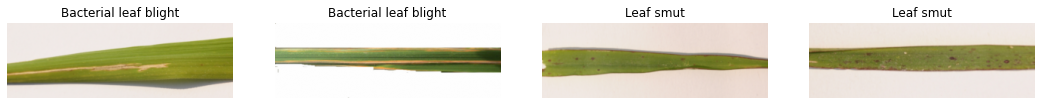

In [16]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    axes[i].axis('off')
    #axes[i].imshow(X_train[i])
    print(X_train[i].shape)
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])
    

## Data Feature Extraction
Feature extraction allows us to reduce the dimensionality of our input data.

In [18]:
from skimage.feature import hog

from sklearn.preprocessing import StandardScaler
def features(X_in):
    gray = np.array([skimage.color.rgb2gray(img) for img in X_in])
    hogt = np.array([ hog(x ,orientations=12,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys') for x in gray])
    scale = StandardScaler()
    X_out = scale.fit_transform(hogt)
    return X_out

def hogi(img):
    gray = skimage.color.rgb2gray(img)
    #########ERROR: X NOT DEFINED
    hogt, hogi = hog(x ,orientations=12,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys', visualise = True)
    return hogi

In [19]:
X_train = features(X_train)
print(X_train.shape)

(108, 37800)


#### Processed dataset
Yen thresholding used to get image features

from skimage import filters

thresh_val = filters.threshold_yen(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

print(thresh_val)

# Make sure the larger portion of the mask is considered background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

plt.imshow(mask)

filters.try_all_threshold(im_gray)
#yen filter looks best

In [22]:
##############################################RESUME####################################################
#Resize without features
print(X_train[0].shape)
shape = X_train[0].shape[0]*X_train[0].shape[1]*X_train[0].shape[2]
print(shape)

(37800,)


IndexError: tuple index out of range

## Training
Data is first split into training and testing set

### Support Vector Machine (SVM)

In [90]:
#test
tt = []
for i in range(len(X_train)):
    tt.append(X_train[i].reshape(-1))
tt = np.asarray(tt)
print(tt[7])
print(tt.shape)
#print(y_train)

[0.93077542 0.91545516 0.86735    0.58775216 0.56453382 0.5252602
 1.         0.99314379 0.96162745 1.         0.99619402 0.97254042
 1.         0.99217382 0.97915157 1.         0.99501624 0.98757193
 1.         0.99450869 0.99321569 1.         0.99607843 0.99321569
 1.         0.99655402 0.99321569 1.         0.99660784 0.99239026
 1.         0.99660784 0.98643137 1.         0.99853572 0.98390173
 1.         1.         0.98198039 1.         0.99947059 1.
 1.         0.99947059 1.         1.         0.99947059 1.
 1.         0.99947059 1.         1.         0.99947059 1.
 1.         0.99954029 1.         1.         1.         1.
 1.         1.         1.         0.99728062 1.         1.
 0.99660784 1.         1.         0.99660784 1.         1.
 0.99660784 1.         1.         0.99660784 1.         1.
 0.99972297 0.99639869 1.         1.         0.99607843 1.
 1.         0.99731657 1.         1.         0.99978206 1.
 1.         1.         0.9944934  1.         1.         0.98627559
 

In [20]:
'''
tt=9 * [5 * [8]]
tt = np.asarray(tt)
print(tt)
print(tt.shape)

print(a.shape)
'''
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
#test processing
for i in range(len(X_test)):
    X_test[i] = (skimage.transform.resize(X_test[i], (100,300))).reshape(shape).T
print(len(X_test))

NameError: name 'shape' is not defined

In [93]:
y_pred = clf.predict(X_test)
print(y_pred)

['Brown spot' 'Brown spot' 'Brown spot' 'Brown spot' 'Brown spot'
 'Brown spot' 'Brown spot' 'Brown spot' 'Brown spot' 'Brown spot'
 'Brown spot' 'Brown spot']


### HOG_SVM

In [23]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
X_test0 = features([skimage.transform.resize(x, (100,300)) for x in X_test])
y_test0 = clf.predict(X_test0)

(323, 1504, 3)
(197, 699, 3)
(897, 3081, 3)
(104, 467, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(250, 766, 3)
(200, 250, 3)
(897, 3081, 3)
(897, 3081, 3)
['Leaf smut' 'Leaf smut' 'Bacterial leaf blight' 'Leaf smut'
 'Bacterial leaf blight' 'Leaf smut' 'Bacterial leaf blight'
 'Bacterial leaf blight' 'Leaf smut' 'Brown spot' 'Bacterial leaf blight'
 'Brown spot']


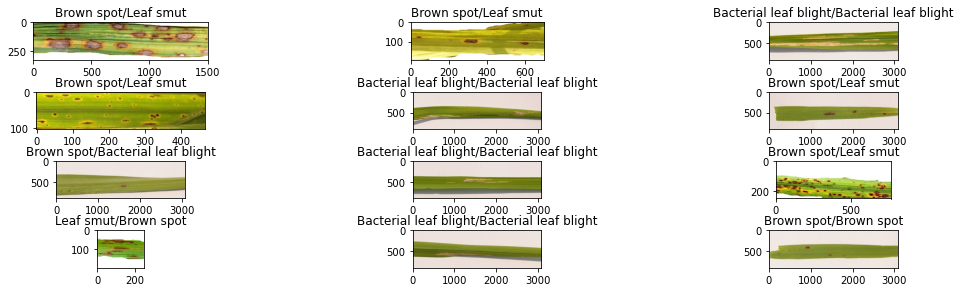

In [54]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(4, 3)
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for i in range(4):
    for j in range(3):
        # axes[i].axis('off')
        print(X_test[i*3+j].shape)
        axes[i][j].imshow(X_test[i*3+j], cmap='Greys')
        axes[i][j].set_title(str(y_test[i*3+j])+"/"+str(y_test0[i*3+j]))
print(y_test0)

In [29]:
xt = [hogi(skimage.transform.resize(x, (100,300))) for x in X_test]

NameError: name 'x' is not defined

NameError: name 'xt' is not defined

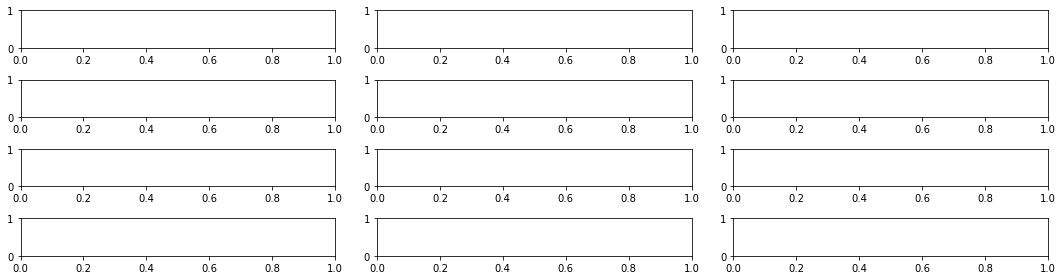

In [30]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(4, 3)
fig.set_size_inches(15,4)
fig.tight_layout()
 

for i in range(4):
    for j in range(3):
        # axes[i].axis('off')
        # xt = [skimage.transform.resize(x, (100,300)) for x in X_test]
        # print(xt[i*3+j].shape)
        axes[i][j].imshow(xt[i*3+j], cmap='gray')
        axes[i][j].set_title(str(y_test[i*3+j])+"/"+str(y_test0[i*3+j]))


In [ ]:
plt.imshow(hogi(xt[0]))

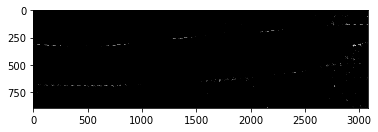

In [162]:
plt.imshow(xt[0], cmap='gray')

low/upp: 91.22610306722346/273.6783092016704
low/upp: 101.30730591732706/303.9219177519812
low/upp: 103.15126141533702/309.4537842460111
low/upp: 80.23470079353896/240.7041023806169
low/upp: 106.79160874459643/320.3748262337893
low/upp: 108.99169953699811/326.97509861099434
low/upp: 106.32705749087549/318.9811724726265
low/upp: 99.34381651316079/298.03144953948237
low/upp: 113.2133582360673/339.6400747082019
low/upp: 109.99425515742311/329.98276547226936
low/upp: 104.71594055794193/314.14782167382583
low/upp: 110.71147530457813/332.1344259137344


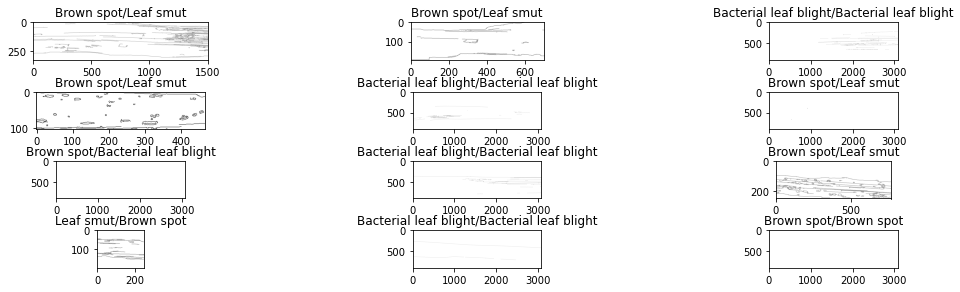

In [57]:
#Canny test
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(4, 3)
fig.set_size_inches(15,4)
fig.tight_layout()
 

for i in range(4):
    for j in range(3):
        a = get_edges(X_test[i*3+j])
        axes[i][j].imshow(a, cmap='binary')
        axes[i][j].set_title(str(y_test[i*3+j])+"/"+str(y_test0[i*3+j]))


### K Nearest Neighbours

## References
[1] https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

[2] https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

[3] https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio